## Importing necessary libraries


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import random
import os
from tensorflow.python.framework import ops
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

## Defining path

In [2]:

data="C:\\Users\\USER\\Downloads\\kagglecatsanddogs_3367a\\PetImages"
Categories=["Dog", "Cat"]


## Joining the two directories of dogs and cats together


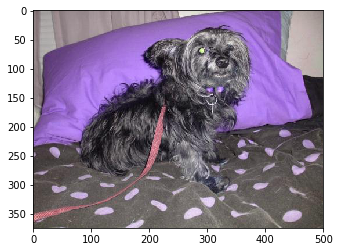

In [3]:


#config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)

for category in Categories:
    
     # here we need to join the path of the directories of dogs and cats together
    path=os.path.join(data, category)
    
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path, img) ) #converting the photo to greyscale
        plt.imshow(img_array)
        plt.show()
        break
    break    
    
    

In [4]:
print(img_array)

[[[126 115 117]
  [126 115 117]
  [130 117 119]
  ...
  [142 132 132]
  [141 131 131]
  [141 131 131]]

 [[127 116 118]
  [126 115 117]
  [130 117 119]
  ...
  [144 134 134]
  [143 133 133]
  [143 133 133]]

 [[128 117 119]
  [127 116 118]
  [131 118 120]
  ...
  [146 136 136]
  [145 135 135]
  [145 135 135]]

 ...

 [[ 84  80  75]
  [ 79  75  70]
  [ 78  74  69]
  ...
  [ 85  82  74]
  [ 81  78  70]
  [ 78  75  67]]

 [[ 83  79  74]
  [ 77  73  68]
  [ 74  70  65]
  ...
  [ 77  74  66]
  [ 78  75  67]
  [ 79  76  68]]

 [[ 79  75  70]
  [ 76  72  67]
  [ 75  71  66]
  ...
  [ 80  77  69]
  [ 78  75  67]
  [ 76  73  65]]]


In [5]:
print(img_array.shape)


(375, 500, 3)


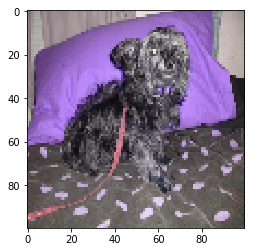

In [6]:
#The sizes of all the photos are different. 
# changing the size of every photo to a constant size to work for CNN

img_size= 100

new_images=cv2.resize(img_array, (img_size, img_size), cv2.IMREAD_GRAYSCALE)  # size of image is 100*100
plt.imshow(new_images, cmap='gray')
plt.show()


## Creating Training Data

In [7]:
training_data=[]
def create_training_data():
    for category in Categories:
    
        # here we need to join the path of the directories of dogs and cats together
        path=os.path.join(data, category)

        #here we create catogories for the classes for comparison
        class_num=Categories.index(category)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  #converting the photo to grayscale
                new_images=cv2.resize(img_array, (img_size, img_size))  # size of image is 100*100
                training_data.append([new_images, class_num])
                #print(class_num)
            except Exception as e:
                pass

create_training_data()      

In [8]:
print(len(training_data))

24946


## Randomizing the data so to make the learning efficient

In [9]:
random.shuffle(training_data)

In [10]:
x=[]
y=[]

for features, label in training_data:
    x.append(features)
    y.append(label)
#print(X)

#converting the pixels into a numpy array
#-1 for including all the images
# img_size for the image size that we have taken
# 1 since the image has been taken in a grayscale format
x=np.array(x).reshape([-1, img_size, img_size, 1])
           
           

In [11]:
#normalising the data by dividing it by the maximum value of pixel

x=x/255.0


## Building the model

In [12]:

#Since the model is Sequential
model=Sequential()


#First Convolutional Layer

#convolving the input layer with a 3*3 filter 
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))

#after Convolution, we can either pass activation function of Maxpooling
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Convoutional Layer

model.add(Conv2D(64, (3,3)))

model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#Adding the fully connected Layer

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Adding the output Layer
model.add(Dense(1))
model.add(Activation("softmax"))

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=['accuracy'])


model.fit(x, y, batch_size=32,epochs=5, validation_split=0.1)


Train on 22451 samples, validate on 2495 samples
Epoch 1/5
22451/22451 [==============================] - 541s 24ms/step - loss: 7.9808 - acc: 0.4994 - val_loss: 7.8658 - val_acc: 0.5066
Epoch 2/5
22451/22451 [==============================] - 585s 26ms/step - loss: 7.9808 - acc: 0.4994 - val_loss: 7.8658 - val_acc: 0.5066
Epoch 3/5
22451/22451 [==============================] - 600s 27ms/step - loss: 7.9808 - acc: 0.4994 - val_loss: 7.8658 - val_acc: 0.5066
Epoch 4/5
22451/22451 [==============================] - 606s 27ms/step - loss: 7.9808 - acc: 0.4994 - val_loss: 7.8658 - val_acc: 0.5066
Epoch 5/5
22451/22451 [==============================] - 589s 26ms/step - loss: 7.9808 - acc: 0.4994 - val_loss: 7.8658 - val_acc: 0.5066
